In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sys
import os
import missingno as msno  # Librería para valores faltantesfrom boruta import BorutaPy
from matplotlib.dates import date2num


In [2]:
df = pd.read_csv('../data/Ventas.csv', sep=';')
df.info(show_counts=True)

C:\Users\Cansaya\AppData\Local\Temp\ipykernel_24656\2721094389.py:1: DtypeWarning: Columns (0,1,2,4,5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Ventas.csv', sep=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   IdCliente      127255 non-null  object 
 1   NombreCliente  127255 non-null  object 
 2   Fecha          127255 non-null  object 
 3   Empleado       127255 non-null  float64
 4   Referencia     127255 non-null  object 
 5   Descripcion    127255 non-null  object 
 6   CodigoFamilia  127255 non-null  float64
 7   Familia        127255 non-null  object 
 8   Cantidad       127255 non-null  object 
 9   Ventas         127255 non-null  object 
 10  Localidad      127255 non-null  object 
 11  Sede           127256 non-null  object 
 12  Area           127255 non-null  float64
dtypes: float64(3), object(10)
memory usage: 104.0+ MB


In [3]:
# Agregamos el archivo util_functions.py
module_path = os.path.abspath(os.path.join('..', 'functions_RoCCO'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)

# Importa la función missing_case_summary
from util_functions import *

In [4]:
# Revisamos valores faltantes y porcentajes
missing_data_by_column(df)

,variable,n_missing,n_cases,complete_cases,pct_missing
0,IdCliente,921320,1048575,127255,87.8640
1,NombreCliente,921320,1048575,127255,87.8640
2,Fecha,921320,1048575,127255,87.8640
3,Empleado,921320,1048575,127255,87.8640
4,Referencia,921320,1048575,127255,87.8640
5,Descripcion,921320,1048575,127255,87.8640
6,CodigoFamilia,921320,1048575,127255,87.8640
7,Familia,921320,1048575,127255,87.8640
8,Cantidad,921320,1048575,127255,87.8640
9,Ventas,921320,1048575,127255,87.8640


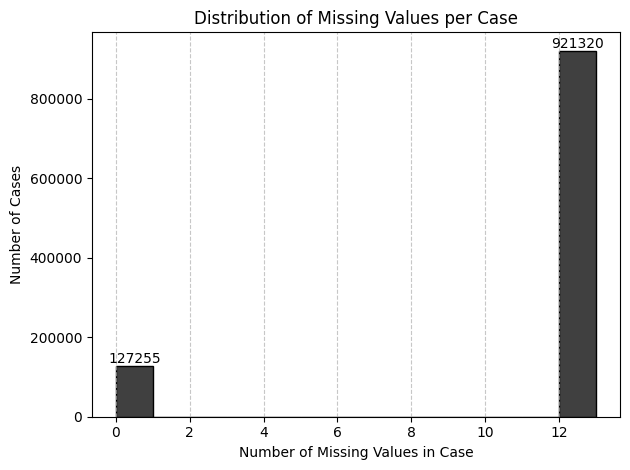

,n_missing_in_case,n_cases,pct_case
0,13,921319,87.86
1,0,127255,12.14
2,12,1,0.00


In [5]:
summarize_missing_cases(df, plot=True)

In [6]:
df = df.dropna(how='any')
missing_data_by_column(df)

,variable,n_missing,n_cases,complete_cases,pct_missing
0,IdCliente,0,127255,127255,0.0
1,NombreCliente,0,127255,127255,0.0
2,Fecha,0,127255,127255,0.0
3,Empleado,0,127255,127255,0.0
4,Referencia,0,127255,127255,0.0
5,Descripcion,0,127255,127255,0.0
6,CodigoFamilia,0,127255,127255,0.0
7,Familia,0,127255,127255,0.0
8,Cantidad,0,127255,127255,0.0
9,Ventas,0,127255,127255,0.0


In [7]:
df.sample(10)

,IdCliente,NombreCliente,Fecha,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area
24201,C860013873,CORPORACION ABRAHAM LINCOLN,10/5/2017,29.0,SE-CT-1-0001,ALINEACION DIRECCION / CT,106.0,SERVICIOS,1,32759,Engativa,Ventas externas,22.0
123840,C1014189212,CARDONA CAMILO,5/2/2020,44.0,SE-CS-1-0001,ALINEACION AUTO,106.0,SERVICIOS,1,37815,Engativa,Calle 80,31.0
13078,C79980200,GAMBOA FELIPE,3/1/2017,22.0,LL-TCA-0100,PRIMACY 3 ZP 205/55R16,101.0,LLANTA,4,1537931,Engativa,Calle 80,31.0
100207,C79876090,SOLER JUAN,19/6/2019,14.0,SE-CS-2-0001,BALANCEO AUTO,106.0,SERVICIOS,4,33613,Suba,Suba,32.0
91638,C51794829,PENAGOS MARGARITA,21/3/2019,50.0,SE-CS-1-0002,ALINEACION CAMIONETA,106.0,SERVICIOS,1,33613,Engativa,Calle 80,31.0
106406,C79391412,BELTRAN TORRES OSCAR FERMIN,23/8/2019,44.0,SE-CS-15-0009,MANO OBRA MECANICA MOTOR X HORA,106.0,SERVICIOS,1,12605,Engativa,Calle 80,31.0
107191,C20454357,CASTILLO PILAR,31/8/2019,14.0,VFR-0027,FILTRO DE AIRE AIP-844,109.0,FILTROS,1,22689,Suba,Suba,32.0
45097,C80009728,CORTAZAR MANUEL,9/12/2017,14.0,SE-CS-1-0001,ALINEACION AUTO,106.0,SERVICIOS,1,33614,Suba,Suba,32.0
668,C19237374,FORERO ARMANDO,7/9/2016,14.0,SE-CS-1-0001,ALINEACION AUTO,106.0,SERVICIOS,1,25862,Suba,Suba,32.0
14978,C20337748,CALERO DE URIBE PATRICIA,23/1/2017,12.0,SE-CS-8-0001,CAMBIO DE ACEITE,106.0,SERVICIOS,1,840,Usaquen,Santa ana,33.0


In [8]:
df['Familia'].value_counts()

Familia
SERVICIOS      88230
LLANTA         19426
FILTROS        10291
LUBRICANTES     4832
REENCAUCHE      4476
Name: count, dtype: int64

In [9]:
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce',format='%d/%m/%Y')
cols_int = ['Empleado', 'CodigoFamilia', 'Area']
df[cols_int] = df[cols_int].apply(pd.to_numeric, errors='coerce').astype('Int64')

cols_cat = ['Familia', 'Localidad', 'Sede']
df[cols_cat] = df[cols_cat].astype('category')

cols_flo = ['Cantidad','Ventas']
df[cols_flo] = df[cols_flo].apply(pd.to_numeric, errors='coerce').astype('float')

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 127255 entries, 0 to 127254
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   IdCliente      127255 non-null  object        
 1   NombreCliente  127255 non-null  object        
 2   Fecha          127255 non-null  datetime64[ns]
 3   Empleado       127255 non-null  Int64         
 4   Referencia     127255 non-null  object        
 5   Descripcion    127255 non-null  object        
 6   CodigoFamilia  127255 non-null  Int64         
 7   Familia        127255 non-null  category      
 8   Cantidad       127253 non-null  float64       
 9   Ventas         127250 non-null  float64       
 10  Localidad      127255 non-null  category      
 11  Sede           127255 non-null  category      
 12  Area           127255 non-null  Int64         
dtypes: Int64(3), category(3), datetime64[ns](1), float64(2), object(4)
memory usage: 11.4+ MB


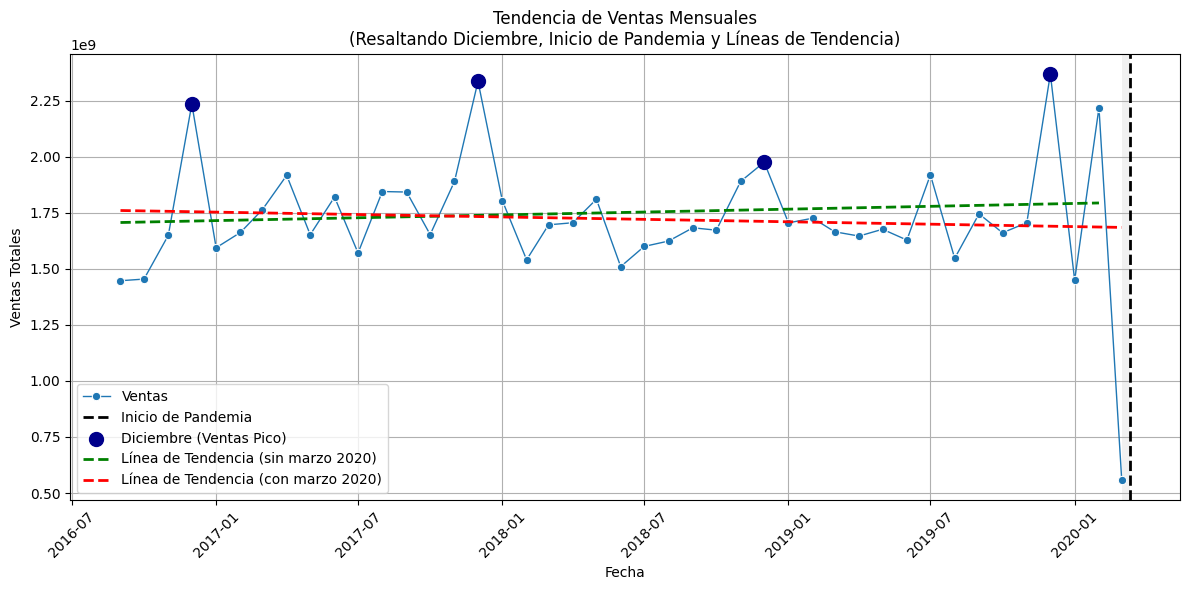

In [10]:
# Agrupar por mes y sumar las ventas
ventas_por_mes = df.groupby(df['Fecha'].dt.to_period("M"))['Ventas'].sum().reset_index()

# Convertir el período a datetime (por ejemplo, "2020-11-01")
ventas_por_mes['Fecha'] = ventas_por_mes['Fecha'].dt.to_timestamp()

# Extraer el mes del timestamp para identificar diciembre
ventas_por_mes['Mes'] = ventas_por_mes['Fecha'].dt.month

# Crear el gráfico base de la tendencia de ventas mensuales
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fecha', y='Ventas', data=ventas_por_mes, marker='o', linewidth=1, label="Ventas")

# Definir la fecha de inicio de la pandemia: 11 de marzo de 2020
pandemia_start = pd.to_datetime("2020-03-11")
plt.axvline(x=pandemia_start, color='black', linestyle='--', linewidth=2, label='Inicio de Pandemia')
plt.axvspan(pandemia_start, ventas_por_mes['Fecha'].max(), facecolor='lightgray', alpha=0.3)

# Resaltar los puntos correspondientes a diciembre con un scatter plot (Mes = 12)
dic_points = ventas_por_mes[ventas_por_mes['Mes'] == 12]
plt.scatter(dic_points['Fecha'], dic_points['Ventas'], color='darkblue', s=100, zorder=5, label="Diciembre (Ventas Pico)")

# Agregar línea de tendencia sin considerar marzo de 2020:
# Filtrar los datos para excluir marzo de 2020
ventas_trend = ventas_por_mes[~((ventas_por_mes['Fecha'].dt.year == 2020) & (ventas_por_mes['Fecha'].dt.month == 3))]

# Convertir las fechas a números para el ajuste lineal
x_num = date2num(ventas_trend['Fecha'])
# Ajustar una línea lineal (polinomio de grado 1)
coeffs = np.polyfit(x_num, ventas_trend['Ventas'], 1)
trend_line = np.poly1d(coeffs)(x_num)
plt.plot(ventas_trend['Fecha'], trend_line, color='green', linestyle='--', linewidth=2, label="Línea de Tendencia (sin marzo 2020)")

# Agregar línea de tendencia incluyendo a marzo de 2020:
# Convertir las fechas a números para el ajuste lineal
x_num_2 = date2num(ventas_por_mes['Fecha'])
# Ajuste lineal (polinomio de grado 1)
coeffs = np.polyfit(x_num_2, ventas_por_mes['Ventas'], 1)
trend_line = np.poly1d(coeffs)(x_num_2)
plt.plot(ventas_por_mes['Fecha'], trend_line, color='red', linestyle='--', linewidth=2, label="Línea de Tendencia (con marzo 2020)")

plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.title('Tendencia de Ventas Mensuales\n(Resaltando Diciembre, Inicio de Pandemia y Líneas de Tendencia)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


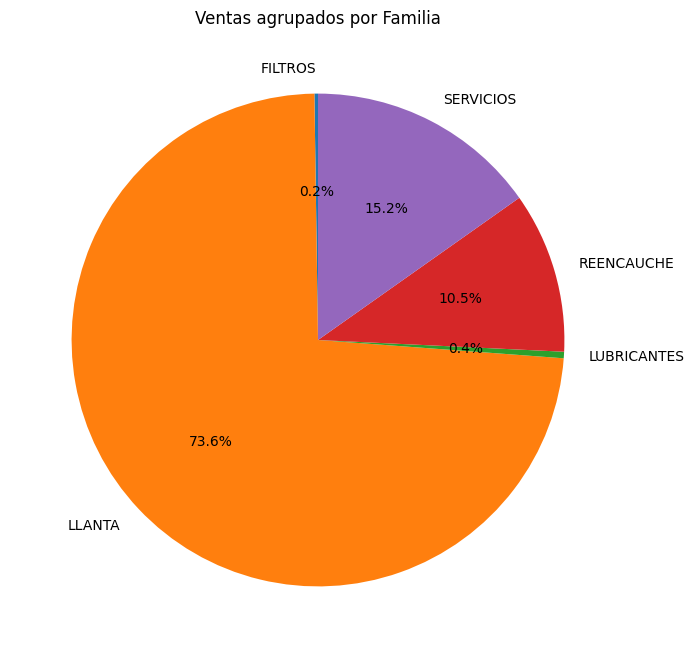

In [11]:
# Supongamos que 'df' es tu DataFrame y que tiene las columnas 'Familia' y 'Ventas'
# Asegúrate de que la columna 'Familia' esté en el tipo adecuado, por ejemplo, category o string

# Agrupar por 'Familia' y sumar las ventas
ventas_por_familia = df.groupby('Familia', observed=False)['Ventas'].sum()

# Generar el diagrama de pastel
plt.figure(figsize=(8, 8))
plt.pie(ventas_por_familia, 
        labels=ventas_por_familia.index, 
        autopct='%1.1f%%',    # Muestra los porcentajes con un decimal
        startangle=90)        # Inicia el gráfico en 90 grados para mejor presentación
plt.title('Ventas agrupados por Familia')
plt.show()


C:\Users\Cansaya\AppData\Local\Temp\ipykernel_24656\2946432838.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_por_mes_familia = df.groupby(['Mes', 'Familia'])['Ventas'].sum().reset_index()


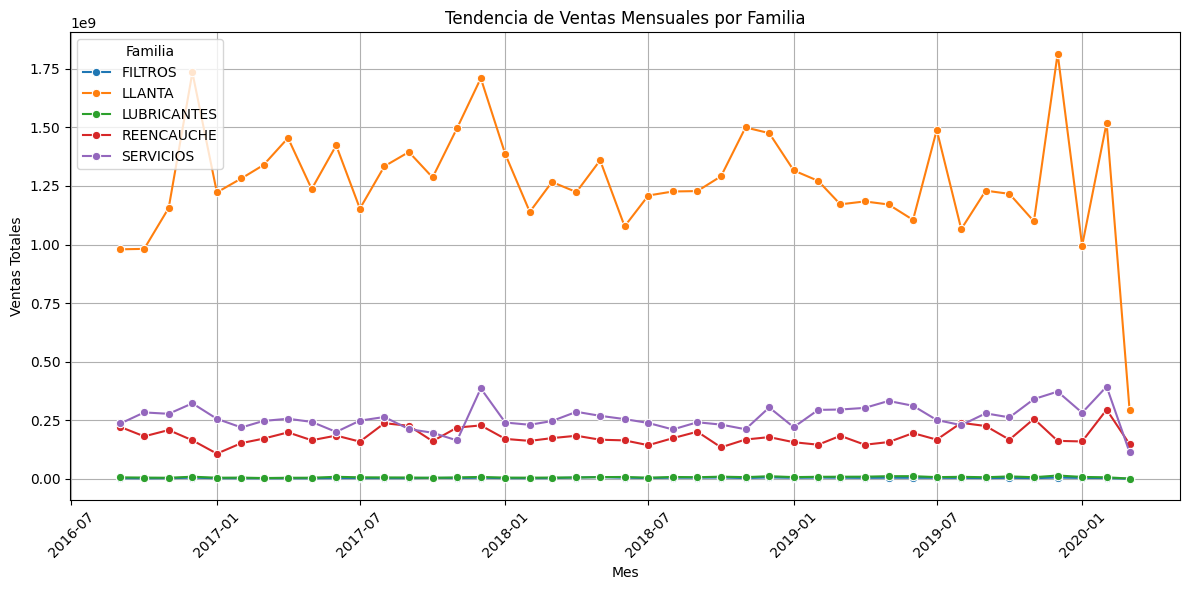

In [12]:

# Asegúrate de que la columna 'Fecha' esté en formato datetime

# Agrupar por mes y familia, y sumar las ventas
df['Mes'] = df['Fecha'].dt.to_period('M')
ventas_por_mes_familia = df.groupby(['Mes', 'Familia'])['Ventas'].sum().reset_index()

# Convertir 'Mes' a formato datetime para una correcta visualización
ventas_por_mes_familia['Mes'] = ventas_por_mes_familia['Mes'].dt.to_timestamp()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_por_mes_familia, x='Mes', y='Ventas', hue='Familia', marker='o')

# Configurar etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.title('Tendencia de Ventas Mensuales por Familia')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Familia')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\Cansaya\AppData\Local\Temp\ipykernel_24656\609464517.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_por_mes_familia = df.groupby(['Mes', 'Familia'])['Ventas'].sum().reset_index()


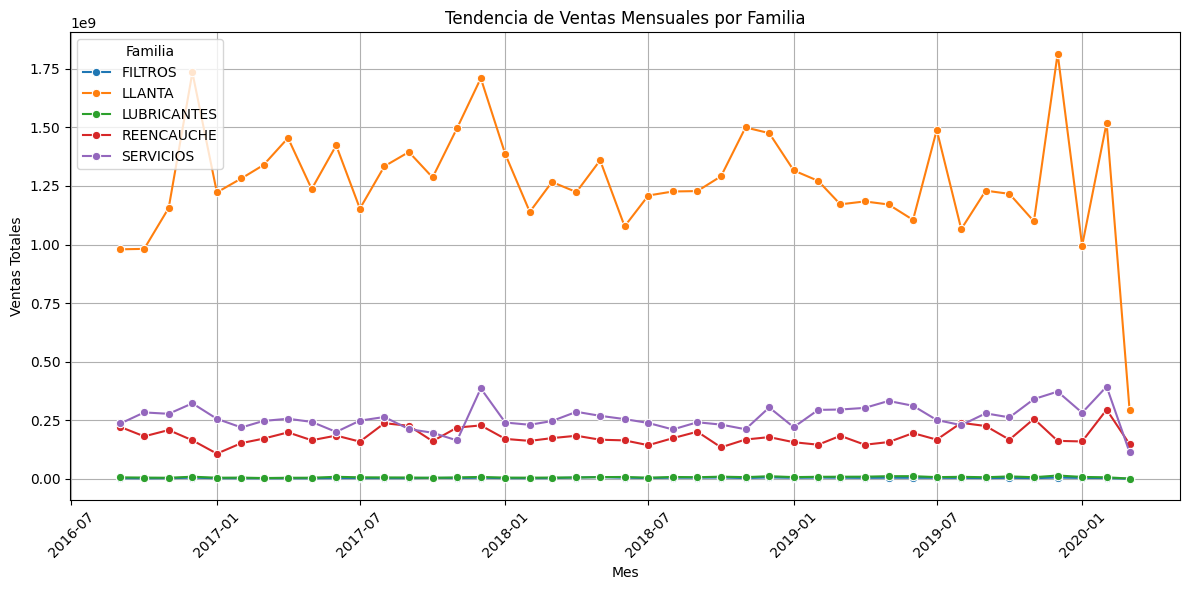

In [13]:
# Agrupar por mes y familia, y sumar las ventas
df['Mes'] = df['Fecha'].dt.to_period('M')
ventas_por_mes_familia = df.groupby(['Mes', 'Familia'])['Ventas'].sum().reset_index()

# Convertir 'Mes' a formato datetime para una correcta visualización
ventas_por_mes_familia['Mes'] = ventas_por_mes_familia['Mes'].dt.to_timestamp()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_por_mes_familia, x='Mes', y='Ventas', hue='Familia', marker='o')

# Configurar etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.title('Tendencia de Ventas Mensuales por Familia')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Familia')
plt.tight_layout()

# Mostrar el gráfico
plt.show()